## Master in Science in Data Analytics for Business

CA1 - Statistic for Data Analytics
 
**Student:** Wendy Paola Espinoza Potoy  ID: 2021133

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

In [101]:
Child_mortality =pd.read_csv("Infant and Neonatal Mortality.csv")

In [102]:
Child_mortality.head()

Statistic Label  Year          Age Range           Principal Cause of Death  \
0          Deaths  1980  Infant (0-1 year)  Infectious and parasitic diseases   
1          Deaths  1980  Infant (0-1 year)  Infectious and parasitic diseases   
2          Deaths  1980  Infant (0-1 year)  Infectious and parasitic diseases   
3          Deaths  1980  Infant (0-1 year)  Infectious and parasitic diseases   
4          Deaths  1980  Infant (0-1 year)  Infectious and parasitic diseases   

                     Area    UNIT  VALUE  
0                  Carlow  Number    NaN  
1  Dublin City and County  Number    5.0  
2                 Kildare  Number    NaN  
3                Kilkenny  Number    1.0  
4                   Laois  Number    NaN

In [103]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
Child_mortality = pd.read_csv("Infant and Neonatal Mortality.csv", na_values = missing_value_formats,  dtype={'VALUE': float})

In [104]:
##Using interpolation to handle missing values
Child_mortality['VALUE'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(Child_mortality['VALUE'].head(10)) 

0    NaN
1    5.0
2    3.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: VALUE, dtype: float64


In [105]:
Child_mortality = Child_mortality.dropna()
Child_mortality.count() 


Statistic Label             67391
Year                        67391
Age Range                   67391
Principal Cause of Death    67391
Area                        67391
UNIT                        67391
VALUE                       67391
dtype: int64

In [106]:
Child_mortality.isnull().sum()

Statistic Label             0
Year                        0
Age Range                   0
Principal Cause of Death    0
Area                        0
UNIT                        0
VALUE                       0
dtype: int64

## Exploratory Data Analysis

In [107]:
# Calculare media, median, standar deviation
Value = Child_mortality["VALUE"]
Value

1        5.0000
2        3.0000
3        1.0000
4        1.0000
5        1.0000
          ...  
67387    1.0425
67388    1.2900
67389    1.2900
67390    1.2900
67391    1.2900
Name: VALUE, Length: 67391, dtype: float64

In [108]:
Number = Child_mortality.loc[Child_mortality['UNIT']=='Number']
rate = Child_mortality.loc[Child_mortality['UNIT']=='Rate' ] 

In [109]:
Mortality_rate = pd.merge(Number, rate, on=["Year","Age Range","Principal Cause of Death", "Area", ])
Mortality_rate.shape

(33695, 10)

In [110]:
#drop columns

Mortality_rate = Mortality_rate.drop(["Statistic Label_y", "UNIT_x", "UNIT_y","Statistic Label_x"], axis=1)

Mortality_rate.head()

Year          Age Range           Principal Cause of Death  \
0  1980  Infant (0-1 year)  Infectious and parasitic diseases   
1  1980  Infant (0-1 year)  Infectious and parasitic diseases   
2  1980  Infant (0-1 year)  Infectious and parasitic diseases   
3  1980  Infant (0-1 year)  Infectious and parasitic diseases   
4  1980  Infant (0-1 year)  Infectious and parasitic diseases   

                     Area  VALUE_x  VALUE_y  
0  Dublin City and County      5.0    0.240  
1                 Kildare      3.0    0.475  
2                Kilkenny      1.0    0.710  
3                   Laois      1.0    0.645  
4                Longford      1.0    0.580

In [111]:
Mortality_rate = Mortality_rate.rename(columns={"Statistic Label_x":"Statistic Label", "VALUE_x": "Number", "VALUE_y":"Rate" })
Mortality_rate.head()

Year          Age Range           Principal Cause of Death  \
0  1980  Infant (0-1 year)  Infectious and parasitic diseases   
1  1980  Infant (0-1 year)  Infectious and parasitic diseases   
2  1980  Infant (0-1 year)  Infectious and parasitic diseases   
3  1980  Infant (0-1 year)  Infectious and parasitic diseases   
4  1980  Infant (0-1 year)  Infectious and parasitic diseases   

                     Area  Number   Rate  
0  Dublin City and County     5.0  0.240  
1                 Kildare     3.0  0.475  
2                Kilkenny     1.0  0.710  
3                   Laois     1.0  0.645  
4                Longford     1.0  0.580

In [112]:
Number = Mortality_rate["Number"]
Rate = Mortality_rate["Rate"]

## Descriptive statistics

In [113]:
def mean(number):
    length = len(number)
    total_sum = 0
    for i in range(length):
        total_sum += number[i]
    average = total_sum / length
    return average

In [114]:
mean_of_number = mean(Number)
print (mean_of_number)

2.358008250482267


In [115]:
np.mean(Number)

2.3580082504822677

In [122]:
def mean(Rate):
    length = len(Rate)
    total_sum = 0
    for i in range(length):
        total_sum += Rate[i]
    average = total_sum / length
    return average

In [123]:
mean_of_rate = mean(Rate)
mean_of_rate

0.8922985606173006

In [124]:
np.mean(Rate)

0.8922985606173023

In [125]:
Number = Mortality_rate["Number"]
def variance(number):
    length=len(number)
    avg=mean(number)
    sumsq=0
    for i in range(length):
        sumsq+=(number[i]-avg)**2
    variance=sumsq/length
    return variance

In [126]:
variance_of_number = variance(Number)
variance_of_number

16.43290664042944

In [127]:
np.var(Number)

16.43290664042944

In [128]:
def std_dev(Number):
    from math import sqrt
    return (sqrt(variance(Number)))

In [129]:
std_dev_of_number = std_dev(Number)
std_dev_of_number 

4.0537521681066595

In [130]:
def std_dev(Rate):
    from math import sqrt
    return (sqrt(variance(Rate)))

In [131]:
std_dev_of_rate = std_dev(Rate)
std_dev_of_rate  

0.8521432981003273

### Printing maximun and minimun values for Number and Rate 

In [132]:
print( "The maximun value for Number of deaths is:", np.max(Number))
print("The minumin value for Number of deaths is:", np.min(Number))

The maximun value for Number of deaths is: 99.0
The minumin value for Number of deaths is: 0.544


In [133]:
print("The maximun value for rate of deaths is:", np.max(Rate))
print("The minumin value for rate of deaths is:", np.min(Rate))

The maximun value for rate of deaths is: 9.92
The minumin value for rate of deaths is: 0.05


## Getting the percentile of Number and Rate

In [134]:
print("0.25th percentile of the Number:", np.quantile(Number,0.25))
print("0.5th percentile of the Number:", np.quantile(Number,0.50))
print("0.75th percentile of the Number:", np.quantile(Number,0.75))

0.25th percentile of the Number: 1.0
0.5th percentile of the Number: 1.0
0.75th percentile of the Number: 2.0


In [135]:
print("0.25th percentile of the rate:", np.quantile(Rate,0.25))
print("0.5th percentile of the rate:", np.quantile(Rate,0.50))
print("0.75th percentile of the rate:", np.quantile(Rate,0.75))

0.25th percentile of the rate: 0.37
0.5th percentile of the rate: 0.6553846153846153
0.75th percentile of the rate: 1.0933333333333333


## Checking Measures of shape

### Skewness


By creating a histogram was posible to see the Rate variable is skewed to the right meaning the majority of the data is positive. It's also posible to observe the Kurtosis is Leptokurtic type because the high and thing. 

In [136]:
Mortality_rate["Rate"].skew()

2.846116582883751

In [137]:
Mortality_rate["Number"].skew()

7.941795329605585

Skewness > 1, meaning the data is skewed to the right due the positive values.

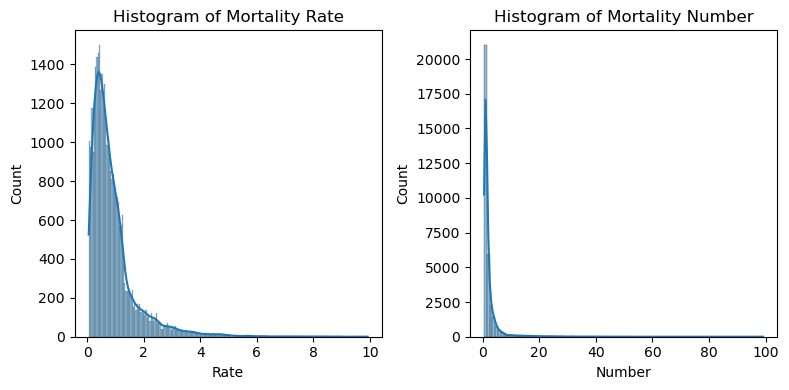

In [138]:
plt.figure(figsize=(8, 4))

# Plot for Mortality Rate
plt.subplot(1, 2, 1)
sns.histplot(Mortality_rate["Rate"], kde=True)
plt.title("Histogram of Mortality Rate")
plt.xlabel("Rate")

# Plot for Mortality Number
plt.subplot(1, 2, 2)
sns.histplot(Mortality_rate["Number"], kde=True, bins=100)
plt.title("Histogram of Mortality Number")
plt.xlabel("Number")

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()




Using a boxplot was posible to see the outliers in Number and Rate variable. 

In [139]:
plt.figure(figsize=(8, 6))
plt.boxplot(Mortality_rate["Number"], vert=False)
plt.title("Box Plot of Number")
plt.xlabel("Number")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [140]:
plt.figure(figsize=(8, 6))
plt.boxplot(Mortality_rate["Rate"], vert=False)
plt.title("Box Plot of Rate")
plt.xlabel("Rate")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Probabability

In [141]:
Mortality_rate.head()

Year          Age Range           Principal Cause of Death  \
0  1980  Infant (0-1 year)  Infectious and parasitic diseases   
1  1980  Infant (0-1 year)  Infectious and parasitic diseases   
2  1980  Infant (0-1 year)  Infectious and parasitic diseases   
3  1980  Infant (0-1 year)  Infectious and parasitic diseases   
4  1980  Infant (0-1 year)  Infectious and parasitic diseases   

                     Area  Number   Rate  
0  Dublin City and County     5.0  0.240  
1                 Kildare     3.0  0.475  
2                Kilkenny     1.0  0.710  
3                   Laois     1.0  0.645  
4                Longford     1.0  0.580

In [142]:
n= len(Mortality_rate)

In [143]:
n = len(Mortality_rate)  # Total number of records in the dataset
prob_die_dublin = (Mortality_rate["Area"] == "Dublin City and County").sum() / n
print("The probability of infant living in Dublin die: {}%".format(100 * prob_die_dublin))

The probability of infant living in Dublin die: 3.7038136221991396%


In [144]:
prob_Infant_0_1year= (Mortality_rate["Age Range"]=="Infant (0-1 year)").sum()/n
print("The probability of Infant (0-1 year) die: {}%".format(100 * prob_Infant_0_1year))

The probability of Infant (0-1 year) die: 24.99777415046743%


# Distributions functions 

## Probability Mass Function (pmf)

In [146]:
# Calculate the PMF for the "Number" column
pmf = Mortality_rate["Rate"].value_counts(normalize=True).sort_index()
print(pmf)

Rate
0.050000    0.006054
0.050617    0.000030
0.050729    0.000030
0.051235    0.000030
0.051458    0.000030
              ...   
8.880000    0.000059
9.330000    0.000030
9.430000    0.000030
9.760000    0.000030
9.920000    0.000030
Name: proportion, Length: 16567, dtype: float64


In [147]:
# Calculate the PMF for the "Number" column
pmf = Mortality_rate["Rate"].value_counts(normalize=True).sort_index()

# Create a bar chart to visualize the PMF
plt.figure(figsize=(20, 10))
plt.bar(pmf.index, pmf.values, width=0.2, align='center', alpha=0.7,)
plt.xlabel("Number of Deaths")
plt.ylabel("Probability")
plt.title("PMF for Number of Deaths")
plt.xticks(pmf.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## Cumulative distribution function (cdf)

In [148]:
cdf=Cdf.from_seq(Mortality_rate["Rate"].value_counts(normalize=True).sort_index())
cdf

proportion
0.000030    0.779864
0.000059    0.898594
0.000089    0.933120
0.000119    0.949780
0.000148    0.959558
              ...   
0.003354    0.999759
0.004155    0.999819
0.005787    0.999879
0.006054    0.999940
0.006381    1.000000
Name: , Length: 83, dtype: float64

Rate
0.050000    0.006054
0.050617    0.006084
0.050729    0.006114
0.051235    0.006143
0.051458    0.006173
              ...   
8.880000    0.999881
9.330000    0.999911
9.430000    0.999941
9.760000    0.999970
9.920000    1.000000
Name: , Length: 16567, dtype: float64


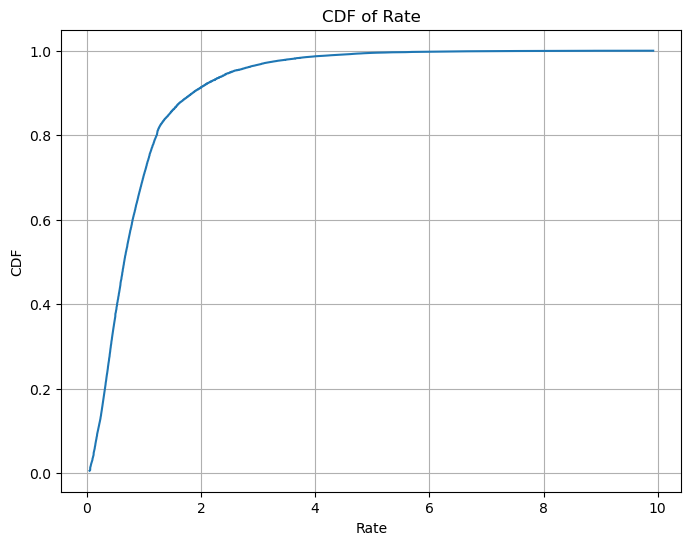

In [149]:
# Create a CDF for the "Rate" column
cdf = Cdf.from_seq(Mortality_rate["Rate"])

# Print the CDF
print(cdf)

# Plot the CDF
plt.figure(figsize=(8, 6))
cdf.plot()
plt.xlabel("Rate")
plt.ylabel("CDF")
plt.title("CDF of Rate")
plt.grid(True)

# Show the plot
plt.show()

## Normal Distribution

In [152]:
from scipy.stats import norm

In [153]:
rates_normal_dist = Mortality_rate['Rate']

# Calculate the mean and standard deviation of the rates
mean_rate = rates_normal_dist .mean()
std_dev_rate = rates_normal_dist .std()

# Convert rates to a normal distribution
normal_distribution = norm.ppf(rates_normal_dist , loc=mean_rate, scale=std_dev_rate)

#transformed values
Mortality_rate['Normal_Distribution'] = normal_distribution

# Display the modified DataFrame
print(Mortality_rate.head())

   Year          Age Range           Principal Cause of Death  \
0  1980  Infant (0-1 year)  Infectious and parasitic diseases   
1  1980  Infant (0-1 year)  Infectious and parasitic diseases   
2  1980  Infant (0-1 year)  Infectious and parasitic diseases   
3  1980  Infant (0-1 year)  Infectious and parasitic diseases   
4  1980  Infant (0-1 year)  Infectious and parasitic diseases   

                     Area  Number   Rate  Normal_Distribution  
0  Dublin City and County     5.0  0.240             0.290419  
1                 Kildare     3.0  0.475             0.838863  
2                Kilkenny     1.0  0.710             1.363869  
3                   Laois     1.0  0.645             1.209178  
4                Longford     1.0  0.580             1.064343  


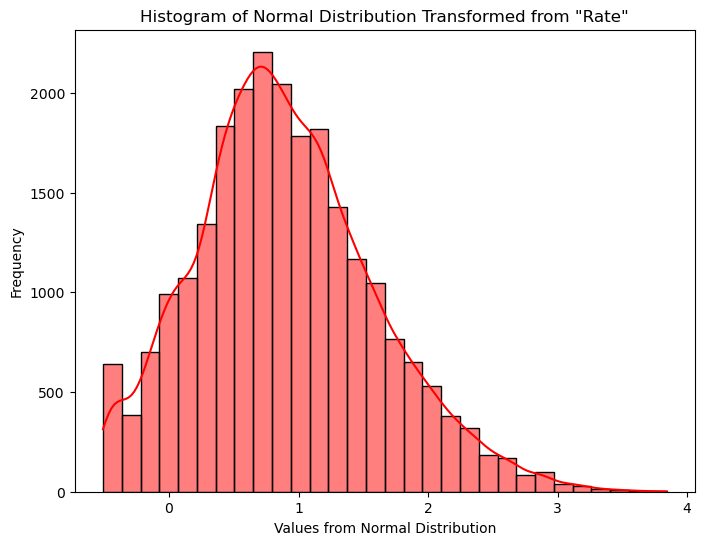

In [154]:
# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(normal_distribution, kde=True, color='r', bins=30)
plt.xlabel('Values from Normal Distribution')
plt.ylabel('Frequency')
plt.title('Histogram of Normal Distribution Transformed from "Rate"')
plt.show()

In [155]:
import pylab
import scipy.stats as stats

stats.probplot(Mortality_norm, dist ="norm", plot=pylab)
pylab.show()

### Comparison new datasetwith distribution with distribution of actual dataset

In [167]:
#  Create new dataset of Rate and normal distribution values
original_rate = Mortality_rate['Rate']
transformed_rate = normal_distribution

# Plot histograms for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(original_rate, kde=True, color='r')
plt.title('Original Distribution of Rate')

plt.subplot(1, 2, 2)
sns.histplot(transformed_rate, kde=True, color='b')
plt.title('Transformed Distribution to Normal')

plt.show()

## Poisson Distribution Examples

In [157]:
from scipy.stats import poisson

In [158]:
mode= Mortality_rate["Number"].median()
mode

1.0

In [159]:
# Filtering the dataset for a specific area and year
area = "Dublin City and County"
year = 1980
area_year_1980 = Mortality_rate[(Mortality_rate["Area"] == area) & (Mortality_rate["Year"] == year)]

# Calculate the average rate lambda for the Poisson distribution
average_rate = area_year_1980["Number"].mean()

# Create a Poisson distribution with lambda equal to the average rate
poisson_dist = poisson(average_rate)

# Define the range of possible numbers of events
x = np.arange(0, 20)

# Calculate the PMF for each number of events
pmf = poisson_dist.pmf(x)


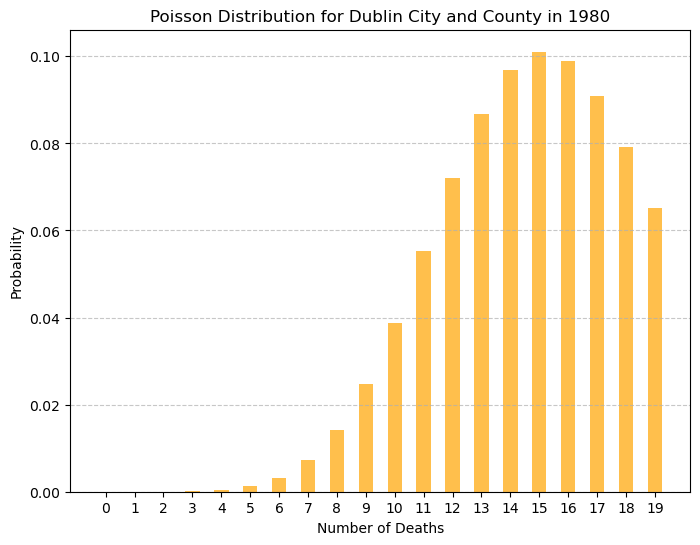

In [160]:
# Create a bar plot to visualize the PMF
plt.figure(figsize=(8, 6))
plt.bar(x, pmf, width=0.5, align='center', alpha=0.7, color="orange")
plt.xlabel("Number of Deaths")
plt.ylabel("Probability")
plt.title(f"Poisson Distribution for {area} in {year}")
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [161]:
# Filtering the dataset for a specific area and year
area = "Dublin City and County"
year = 2018

area_year_2018 = Mortality_rate[(Mortality_rate["Area"] == area) & (Mortality_rate["Year"] == year)]

# Calculate the average rate (lambda) for the Poisson distribution
average_rate = area_year_2018["Number"].mean()

# Create a Poisson distribution with lambda equal to the average rate
poisson_dist = poisson(average_rate)

# Define the range of possible numbers of events
x = np.arange(0, 20)

# Calculate the PMF for each number of events
pmf = poisson_dist.pmf(x)



In [162]:
# Create a bar plot to visualize the PMF
plt.figure(figsize=(8, 6))
plt.bar(x, pmf, width=0.5, align='center', alpha=0.7, color="orange")
plt.xlabel("Number of Deaths")
plt.ylabel("Probability")
plt.title(f"Poisson Distribution for {area} in {year}")
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

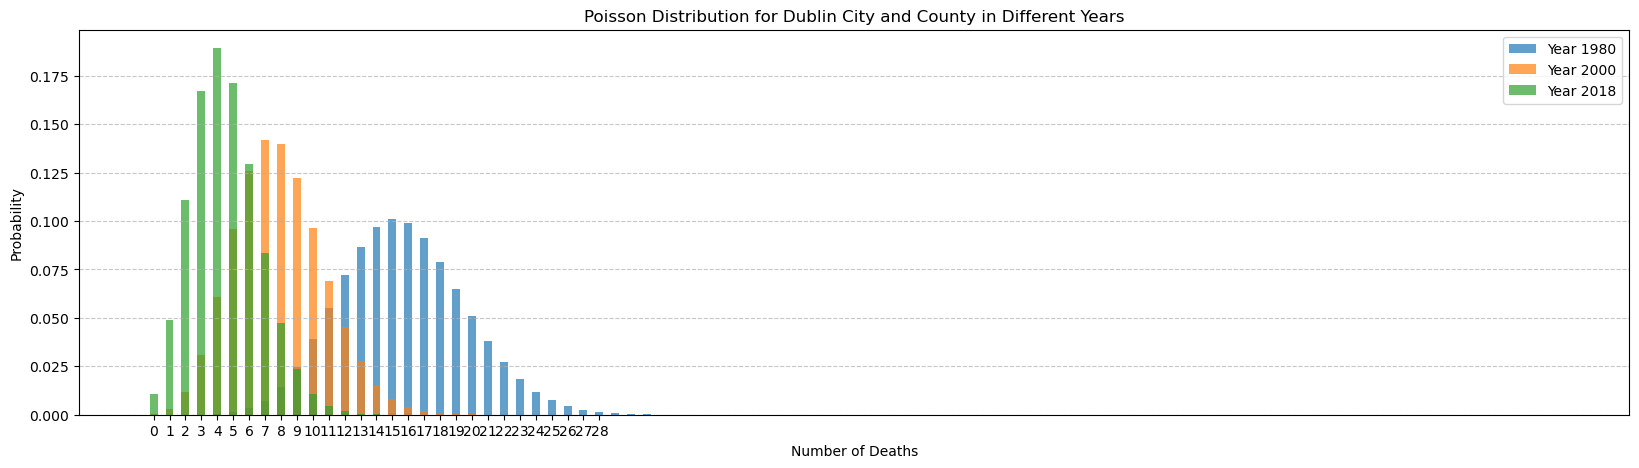

In [169]:
# Assuming 'Number' is the count of deaths
area = "Dublin City and County"
years = [1980, 2000, 2018]

plt.figure(figsize=(20, 5))

for year in years:
    # Filter the dataset for a specific area and year
    filtered_data = Mortality_rate[(Mortality_rate["Area"] == area) & (Mortality_rate["Year"] == year)]

    # Calculate the average rate (lambda) for the Poisson distribution
    average_rate = filtered_data["Number"].mean()

    # Create a Poisson distribution with lambda equal to the average rate
    poisson_dist = poisson(average_rate)

    # Define the range of possible numbers of events
    x = np.arange(0, max(filtered_data["Number"]) + 1)

    # Calculate the PMF for each number of events
    pmf = poisson_dist.pmf(x)

    # Plot the Poisson distribution for each year
    plt.bar(x, pmf, width=0.5, alpha=0.7, label=f'Year {year}')

plt.xlabel("Number of Deaths")
plt.ylabel("Probability")
plt.title(f"Poisson Distribution for {area} in Different Years")
plt.legend()
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
